In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [25]:
X,y = make_moons(n_samples=200, noise=0.05, random_state=420)

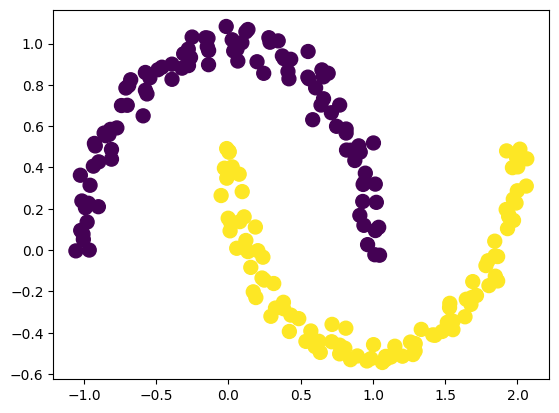

In [26]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)

In [27]:
model = Sequential()

model.add(Dense(10,activation='sigmoid', input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
old_weights = model.get_weights()[0]

In [30]:
old_weights

array([[-0.58973116, -0.15817022,  0.6072697 , -0.5180836 , -0.45989192,
         0.6623724 ,  0.28040397,  0.4973777 ,  0.21090364,  0.30361658],
       [-0.3847331 ,  0.3008346 , -0.2555731 ,  0.12955064,  0.30134422,
        -0.48743808,  0.3054183 ,  0.4676867 , -0.34664416, -0.5962963 ]],
      dtype=float32)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [32]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5248 - loss: 0.9055
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5174 - loss: 0.8990 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4944 - loss: 0.9140  
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5122 - loss: 0.8735  
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5131 - loss: 0.8574  
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4884 - loss: 0.8730 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4914 - loss: 0.8549 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5018 - loss: 0.8299 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4424 - loss: 0.8799 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4658 - loss: 0.8419 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4701 - loss: 0.8257 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5179 - l

In [33]:
new_weights = model.get_weights()[0]

In [34]:
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [35]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [36]:
gradient

array([[ 16.408503  ,   9.129658  ,  20.367144  ,   1.3784765 ,
        -12.7898445 ,  10.566591  ,  35.96036   ,  17.589241  ,
        -18.750517  , -12.5759535 ],
       [-11.800438  ,  -6.0725207 , -16.293808  ,  -0.46548244,
          8.950054  ,  -8.959204  , -24.343878  , -12.340814  ,
         12.92324   ,   8.068681  ]], dtype=float32)

In [37]:
percent_change

array([[ 2.78237   ,  5.772046  ,  3.353888  ,  0.26607224,  2.7810547 ,
         1.5952646 , 12.824484  ,  3.5363953 ,  8.890562  ,  4.142051  ],
       [ 3.0671751 ,  2.018558  ,  6.375401  ,  0.35930544,  2.9700437 ,
         1.8380189 ,  7.970667  ,  2.6386924 ,  3.7280998 ,  1.3531327 ]],
      dtype=float32)